In [1]:
import sys
sys.path.append('../src/')
from vi_hrg_log1pexp import *
from utils import *
from torch import autograd
torch.manual_seed(82)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R.item()-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

In [4]:
logit = lambda x: (x/(1-x)).log()

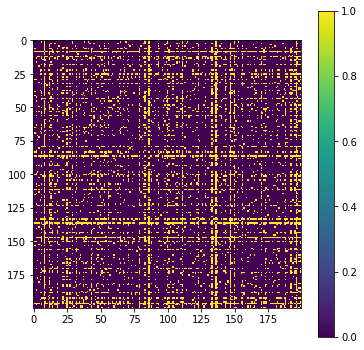

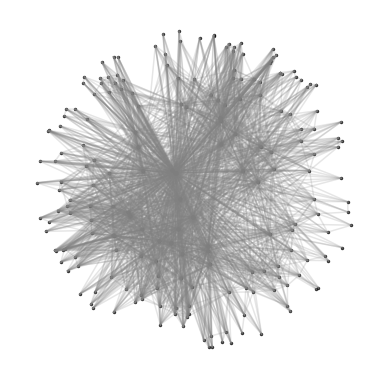

In [7]:
N = 200
R = torch.tensor([8.0]).double()
alpha = .4
T = 0.1

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
G.plot()

In [6]:
A.sum().item()/N**2

0.1199

In [6]:
for t in range(10):
    try:
        r_init = noise_r(r, R, rel_var=0.1)
        phi_init = noise_phi(theta, 0.1)

        r_loc_init = logit(r_init/R)
        r_scale_init = (torch.ones([N]).double()/4).log()
        phi_loc_init = polar2cart(1, phi_init)
        phi_scale_init = (torch.ones([N]).double()*30).log()
        R_conc_init = torch.tensor(10.).log()
        R_scale_init = torch.tensor(1.).log()
        alpha_conc_init = torch.tensor(.5).log()
        alpha_scale_init = torch.tensor(.5).log()
        T_init = torch.tensor([3.,10.]).log()
        dataloader = DataLoader(EdgesDataset(A), batch_size=int(N*8), num_workers=0)
        vi = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                        'rs_scale':r_scale_init,
                                      'phis_loc':phi_loc_init,
                                      'phis_scale':phi_scale_init, 
                                      'R_conc':R_conc_init, 
                                      'R_scale':R_scale_init,
                                      'alpha_conc':alpha_conc_init,
                                      'alpha_scale':alpha_scale_init,
                                      'T':T_init},
                   fixed={'R':None, 
                          'T':None,
                          'alpha':None},
                   priors={'R_p':torch.tensor([20., 0.4]), 
                            'T_p':torch.tensor([1., 15.]),
                            'alpha_p':torch.tensor([27., 0.03])},)
        vi.train(dataloader, lrs=[0.1], debug=False, epochs=30)
        r_x_loc, r_x_scale, phi_x_loc, phi_x_scale, R_x_conc, R_x_scale, T_x, \
            alpha_x_conc, alpha_x_scale = vi.constrained_params()
        hist_samples = [500]
        bins = 30
        R_samples = Gamma(R_x_conc, R_x_scale.reciprocal()).sample(hist_samples)
        alpha_samples = Gamma(alpha_x_conc, alpha_x_scale.reciprocal()).sample(hist_samples)
        T_samples = Beta(T_x[0], T_x[1]).sample(hist_samples)
        plt.figure(figsize=(8,12))
        
        plt.subplot(3, 1, 1)
        plt.hist(R_samples.numpy(), bins=bins)
        plt.axvline(R.item(), color='r')
        plt.title('Estimated R')
        
        plt.subplot(3, 1, 2)
        plt.hist(alpha_samples.numpy(), bins=bins)
        plt.axvline(alpha, color='r')
        plt.title('Estimated alpha')
        
        plt.subplot(3, 1, 3)
        plt.hist(T_samples.numpy(), bins=bins)
        plt.axvline(T, color='r')
        plt.title('Estimated T')
        plt.show()
        print('Likelihood:', vi.likelihood())
    except Exception as e: 
        print(e)

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 331144.72 | Epoch time 36.50
Epoch 2 | LR: 0.10 | Total loss: 247957.58 | Epoch time 36.50
Epoch 3 | LR: 0.10 | Total loss: 232057.76 | Epoch time 40.62


../src/utils.py:121: UserWarning: a_R_ri has NaN in it!
  warnings.warn(str('%s has NaN in it!' % variable))


Infinite loop!!!
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 309308.59 | Epoch time 37.51
Epoch 2 | LR: 0.10 | Total loss: 239377.21 | Epoch time 36.78
Infinite loop!!!
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 319996.77 | Epoch time 36.68
Epoch 2 | LR: 0.10 | Total loss: 242727.05 | Epoch time 33.14
Epoch 3 | LR: 0.10 | Total loss: 227941.72 | Epoch time 38.24
Epoch 4 | LR: 0.10 | Total loss: 218392.38 | Epoch time 44.67
Epoch 5 | LR: 0.10 | Total loss: 213371.55 | Epoch time 36.83
Epoch 6 | LR: 0.10 | Total loss: 209306.02 | Epoch time 34.10
Epoch 7 | LR: 0.10 | Total loss: 206359.90 | Epoch time 37.57
Epoch 8 | LR: 0.10 | Total loss: 203510.39 | Epoch time 35.12
Epoch 9 | LR: 0.10 | Total loss: 200653.49 | Epoch time 47.68
Epoch 10 | LR: 0.10 | Total loss: 198874.51 | Epoch time 52.20
Epoch 11 | LR: 0.10 | Total loss: 196822.89 | Epoch time 39.54
Epoch 12 | LR: 0.10 | Total loss: 195383.64 | Epoch time 41.36
Infinite loop!!!
>>>>>>>>>>>> Sta